# Attempt to visualize ANM in reduced horizontal/vertical coordinate

### Definition of horizontal/vertical coordinate
The total energy is expanded by PP parameters $\{\sigma_I\}$. For the case of two atoms fcc cell (15 parameters per atom), $1\leq I\leq 30$. The collection of the values of all 15 parameters describs where a PP is located on the periodic table. If we only want to describe PP using two parameters of horizontal and vertical displacements from the reference atom, we reduce the dimension of the space from 15 to 2 per atom. That is we need to consider the change of variable from $\{\sigma_I\}_{I=1}^{15}\mapsto\{\lambda_i\}_{i=1}^{2}$, where each of the parameter is a function of horizontal and vertical displacement $\{\lambda_1, \lambda_2\}$ on the peridic table.

For example, if Ge is used as reference atom, the near by atoms are
* Al: (-1, -1) = (one step left, one step up)
* Si: (0, -1)
* P: (+1, 0)
* Ga: (-1, 0)
* As: (+1, 0)
* In: (-1, +1)
* Sn: (0, +1)
* Sb: (+1, +1)

Also for the case of two atom fcc crystal using Ge as reference crystal, we have
* IV-IV crystals
    * Si: (0, -1, 0, -1) 
    * Sn: (0, +1, 0, +1)
    * SiGe: (0, -1, 0, 0)
    * SiSn: (0, -1, 0, +1)
    * GeSn: (0, 0, 0, +1)
* III-V crystals:
    * AlP: (-1, -1, +1, -1)
    * AlAs: (-1, -1, +1, 0)
    * AlSb: (-1, -1, +1, +1)
    * GaP: (-1, 0, +1, -1)
    * GaAs: (-1, 0, +1, 0)
    * GaSb: (-1, 0, +1, +1)
    * InP: (-1, +1, +1, -1)
    * InAs: (-1, +1, +1, 0)
    * INSb: (-1, +1, +1, +1)

### Chain rule derivation
[Forum reference](https://math.stackexchange.com/questions/172324/chain-rule-for-hessian-matrix).

The change of variable gives 
$$\frac{\partial}{\partial\lambda_i} = \sum_{I=1}^{15}\frac{\partial\sigma_I}{\partial\lambda_i}\frac{\partial}{\partial\sigma_I}.$$
The first order derivative in terms of reduced coordinates is therefore
$$\frac{\partial E}{\partial\lambda_i} = \sum_{I=1}^{15}\frac{\partial\sigma_I}{\partial\lambda_i}\frac{\partial E}{\partial\sigma_I}.$$
And the second order derivative is
$$
\begin{array}{rcl}
\displaystyle\frac{\partial^2 E}{\partial\lambda_i\partial\lambda_j} &=& \displaystyle
\displaystyle\Big(\sum_{I=1}^{15}\frac{\partial\sigma_I}{\partial\lambda_i}\frac{\partial}{\partial\sigma_I}\Big)
\Big(\sum_{J=1}^{15}\frac{\partial\sigma_J}{\partial\lambda_j}\frac{\partial}{\partial\sigma_j}\Big)E\\
&=&\displaystyle
\sum_{IJ}
\Big(\frac{\partial\sigma_I}{\partial\lambda_i}\Big)
\Big(\frac{\partial\sigma_J}{\partial\lambda_j}\Big)
\Big(\frac{\partial^2 E}{\partial\sigma_i\partial\sigma_j}\Big).
\end{array}
$$
Note that the parameters are independent from each other which gives $\frac{\partial^2 \sigma_I}{\partial\sigma_J\partial\lambda_i} = 0$.

If the Hessian matrix, $\mathrm{H}=[\frac{\partial^2 E}{\partial\sigma_I\partial\sigma_J}]_{IJ}$, is available, the only information required to perform the above tranfromation is the first order derivatives$\{\frac{\partial\sigma_I}{\partial\lambda_i}\}_{Ii}$

In [25]:
import qctoolkit as qtk
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
%matplotlib inline

# Construct PP up-down/left-right vector

In [2]:
Zs_base = [13, 31, 49]
Zs = []
for Z in Zs_base: Zs.extend(range(Z, Z+3))

In [3]:
pps = [qtk.PP(qtk.Z2n(Z), size=[1,3]) for Z in Zs]

In [4]:
pps = {}
pps[(-1, 0)] = qtk.PP('Al', size=[1,3])
pps[(1, 0)] = qtk.PP('As', size=[1,3])
pps[(0, -1)] = qtk.PP('Si', size=[1,3])
pps[(0, 1)] = qtk.PP('Sn', size=[1,3])

In [14]:
dpp = []
dpp.append(((pps[(1, 0)] + (-1 * pps[(-1, 0)])) / 2).vectorize()[0][1:]) # first left-right
dpp.append(((pps[(0, 1)] + (-1 * pps[(0, -1)])) / 2).vectorize()[0][1:]) # second up-down
dpp

[array([ 0.035     ,  3.77738063, -0.01594286, -0.71963253,  0.96197902,
        -0.53054119, -2.1048349 ,  1.36985147, -1.0872859 , -0.00379196,
        -0.4217535 ,  0.31460413, -0.37224462,  0.35184436,  0.15739752]),
 array([ 0.0825    ,  6.26803532,  0.06540175, -3.69028013,  2.088156  ,
        -0.58928835, -3.65427537,  1.52153597, -1.20768173,  0.07195371,
        -0.95218952,  0.2016289 , -0.23857054,  0.49543651,  0.0993832 ])]

In [53]:
dlambda = []
# loop over all atoms
for i in range(len(cyl_map[0][2])):
    # loop over all dpp
    for j in range(len(dpp)):
        vec = []
        # loop over atom position
        for k in range(len(cyl_map[0][2])):
            if i == k:
                vec.append(dpp[j])
            else:
                vec.append(np.zeros_like(dpp[j]))
        dlambda.append(np.hstack(vec))
dlambda = np.vstack(dlambda)

(4, 30)

In [62]:
dlambda

array([[ 3.50000000e-02,  3.77738063e+00, -1.59428605e-02,
        -7.19632527e-01,  9.61979023e-01, -5.30541195e-01,
        -2.10483490e+00,  1.36985147e+00, -1.08728590e+00,
        -3.79195900e-03, -4.21753501e-01,  3.14604128e-01,
        -3.72244624e-01,  3.51844362e-01,  1.57397518e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.25000000e-02,  6.26803532e+00,  6.54017455e-02,
        -3.69028013e+00,  2.08815600e+00, -5.89288346e-01,
        -3.65427537e+00,  1.52153597e+00, -1.20768173e+00,
         7.19537065e-02, -9.52189520e-01,  2.01628904e-01,
        -2.38570537e-01,  4.95436510e-01,  9.93831975e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [54]:
data = np.load('HG_data.npz')
H_dict = data['H_dict'][()]
H_list = H_dict['ge']

In [61]:
H = H_list[0]
H_red = dlambda.dot(H).dot(dlambda.T)
w, v = np.linalg.eigh(H_red)
v

array([[ 0.51154148,  0.53465797,  0.48924226, -0.46163641],
       [-0.4816451 , -0.46952764,  0.51935944, -0.5270935 ],
       [-0.51813086,  0.5287322 , -0.480118  , -0.47060533],
       [ 0.48773325, -0.46273849, -0.51028863, -0.53627874]])

# Construct periodic table displacement vector

In [26]:
cyl_map = [
        ['si', 5.431, [14, 14]],
        ['ge', 5.658, [32, 32]],
        ['sige', 5.432, [14, 32]],
        ['sn', 6.4892, [50, 50]],
        ['snsi', 5.961, [14, 50]],
        ['gesn', 6.0758, [32, 50]],
        ['gaas', 5.6535, [31, 33]],
        ['alp', 5.4635, [13, 15]],
        ['alas', 5.660, [13, 33]],
        ['alsb', 6.1355, [13, 51]],
        ['gap', 5.451, [31, 15]],
        ['gasb', 6.09, [31, 51]],
        ['inp', 5.86, [49, 15]],
        ['inas', 6.05, [49, 33]],
        ['insb', 6.47, [49, 51]],
]

In [42]:
ref_base = cyl_map[1]
A_ref = [qtk.element[qtk.Z2n(Z)] for Z in ref_base[2]]
#print Z_ref[0].period, Z_ref[0].group

vec_dict = {}
for info_cyl in cyl_map:
    A_list = [qtk.element[qtk.Z2n(Z)] for Z in info_cyl[2]]
    dAs = [[A_list[i].group - Z_ref[i].group, A_list[i].period - Z_ref[i].period] for i in range(len(A_list))]
    vec = []
    for dA in dAs:
        vec.append(dA[0] * dpp[0] + dA[1] * dpp[1])
    vec_dict[info_cyl[0]] = np.hstack(vec)
print vec_dict

{'gaas': array([-0.035     , -3.77738063,  0.01594286,  0.71963253, -0.96197902,
        0.53054119,  2.1048349 , -1.36985147,  1.0872859 ,  0.00379196,
        0.4217535 , -0.31460413,  0.37224462, -0.35184436, -0.15739752,
        0.035     ,  3.77738063, -0.01594286, -0.71963253,  0.96197902,
       -0.53054119, -2.1048349 ,  1.36985147, -1.0872859 , -0.00379196,
       -0.4217535 ,  0.31460413, -0.37224462,  0.35184436,  0.15739752]), 'insb': array([ 0.0475    ,  2.49065468,  0.08134461, -2.97064761,  1.12617697,
       -0.05874715, -1.54944047,  0.15168449, -0.12039583,  0.07574567,
       -0.53043602, -0.11297522,  0.13367409,  0.14359215, -0.05801432,
        0.1175    , 10.04541595,  0.04945889, -4.40991266,  3.05013502,
       -1.11982954, -5.75911026,  2.89138744, -2.29496763,  0.06816175,
       -1.37394302,  0.51623303, -0.61081516,  0.84728087,  0.25678072]), 'gesn': array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0

In [27]:
ref_dir = 'ref'
outs_all = []
for info_a in cyl_map:
    outs = [info_a[0], []]
    outs_all.append(outs)
    for info_cyl in cyl_map:
        cyl = info_cyl[0]
        tar = info_a[0]
        out_file = glob('%s/%s_a-%s/*.out' % (ref_dir, cyl, tar))[0]
        out = qtk.QMOut(out_file, program='cpmd')
        #outs[1].append([out.name.split('.')[0], out])
        outs[1].append(out)

# Crystal inset

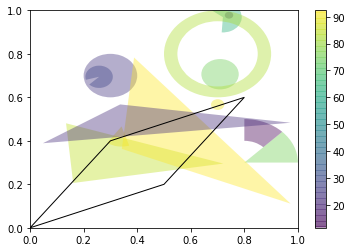

In [69]:
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
ax.add_patch(Polygon([[0, 0], [.3, .4], [.8, .6], [.5, .2]], closed=True,
                      fill=False, hatch=''))

plt.show()

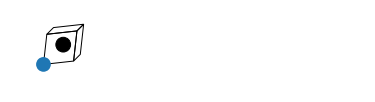

In [140]:
def crystal_plot(Zs, crd=(0.2,0.2), width=.8, depth=.2, size=.5, radius=.22, fraction=0.55, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    signs = [1, -1]
    ax.set_aspect('equal')
        
    A = crd
    C = tuple(a + size for a in A)
    F = tuple(c + size * depth for c in C)
    B = tuple((C[i] + A[i]) / 2. - signs[i] * width / 2. * size for i in range(2))
    D = tuple((C[i] + A[i]) / 2. + signs[i] * width / 2. * size for i in range(2))
    E = tuple(b + size * depth for b in B)
    G = tuple(d + size * depth for d in D)
    H = tuple((C[i] + A[i]) * fraction for i in range(2))
    ax.add_patch(Polygon([A, B, C, D], closed=True, fill=False, hatch=''))
    ax.add_patch(Polygon([B, E, F, C], closed=True, fill=False, hatch=''))
    ax.add_patch(Polygon([D, G, F, C], closed=True, fill=False, hatch=''))
    ax.add_patch(Circle(A, radius * size))
    ax.add_patch(Circle(H, radius * size, color='k'))
    ax.axis('off')
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    
crystal_plot(1, 2, 3)

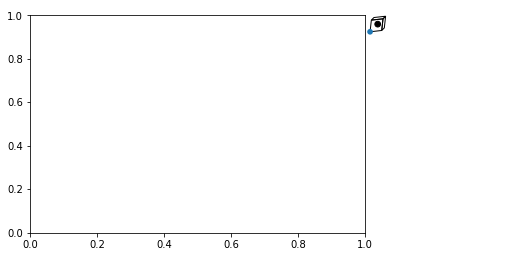

In [139]:
fig, ax = plt.subplots()
ax0 = fig.add_axes([0.9,0.7,0.3,0.3])
crystal_plot(1, 2, ax=ax0)

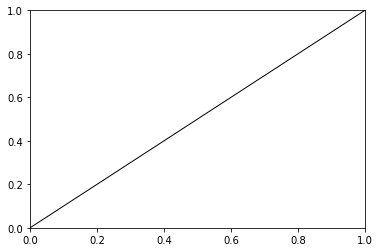

In [72]:
tuple(i for i in tuple(range(10)))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)